# **<center><font style="color:rgb(100,109,254)">Module 6: AI Video Director For Automating Multi-Camera Setup</font> </center>**

<center>
    <img src='https://drive.google.com/uc?export=download&id=19tHZtvNS8ot5c9jvsbjPRk2SkI-8_1_Z' width=800> 
</center>
    

## **<font style="color:rgb(134,19,348)"> Module Outline </font>**

The module can be split into the following parts:

- ***Lesson 1:* Extract Eyes and Nose Keypoints** *(This Tutorial)*

- *Lesson 2: Create an AI Director for Automating a Multi-Camera Setup in OpenCV*

- *Lesson 3: Utilize the AI Director for Automating a Multi-Camera Setup in OBS*

**Please Note**, these Jupyter Notebooks are not for sharing; do read the Copyright message below the Code License Agreement section which is in the last cell of this notebook.
-Taha Anwar

Alright, let's get started.

### **<font style="color:rgb(134,19,348)"> Import the Libraries</font>**

First, we will import the required libraries.

In [1]:
import cv2
import itertools
import numpy as np
import mediapipe as mp
import matplotlib.pyplot as plt
from previous_lesson import detectFacialLandmarks
from importlib.metadata import version
print(f"Mediapipe version: {version('mediapipe')}, it should be 0.8.9.1")

Mediapipe version: 0.8.10.1, it should be 0.8.9.1


## **<font style="color:rgb(134,19,348)">Initialize the Face Landmarks Detection Model</font>**

After that, we will initialize the **`mp.solutions.face_mesh`** class and set up the **`mp.solutions.face_mesh.FaceMesh()`** function (for images and videos as well) with appropriate arguments as we have been doing in the previous lessons.

In [2]:
# Initialize the mediapipe face mesh class.
mp_face_mesh = mp.solutions.face_mesh

# Set up the face landmarks function for images.
face_mesh_images = mp_face_mesh.FaceMesh(static_image_mode=True, max_num_faces=2,
                                         refine_landmarks=True, min_detection_confidence=0.5)

# Set up the face landmarks function for videos.
face_mesh_videos = mp_face_mesh.FaceMesh(static_image_mode=False, max_num_faces=1, 
                                         refine_landmarks=True, min_detection_confidence=0.5,
                                         min_tracking_confidence=0.3)

## **<font style="color:rgb(134,19,348)">Create a Function to Extract Eyes and Nose Keypoints</font>**

Now we will create a function **`getFaceKeypoints()`** that will take in the array of all **`468`** facial landmarks detected by the **`detectFacialLandmarks()`** function (that we had created in a previous module) and will extract the nose tip landmarks and will calculate the left eye center and right eye center landmarks from eyes outline landmarks.

In [3]:
def getFaceKeypoints(image, face_landmarks, draw=True, display=True):
    '''
    This function will extract nose, left eye center, right eye center landmarks.
    Arg:
        image:          A image of the person whose facial landmarks needs to be extracted.
        face_landmarks: An array containing the face landmarks (x and y coordinates) of the face in the image. 
        draw:           A boolean value that is if set to true the function draws the extracted landmarks 
                        on the output image. 
        display:        A boolean value that is if set to true the function displays the original input image, 
                        and the output image with the extracted landmarks drawn and returns nothing.
    Returns:
        output_image:        A copy of input image with extracted landmarks drawn, if it was specified.
        extracted_keypoints: A tuple containing the nose, left eye center, right eye center landmarks.
    '''
    
    # Get the height and width of the image.
    image_height, image_width, _ = image.shape
    
    # Create a copy of the input image to draw facial landmarks.
    output_image = image.copy()
    
    # Get the indexes of the left and right eyes outline landmarks in a list. 
    LEFT_EYE_INDEXES = set(list(itertools.chain(*mp_face_mesh.FACEMESH_LEFT_EYE)))
    RIGHT_EYE_INDEXES = set(list(itertools.chain(*mp_face_mesh.FACEMESH_RIGHT_EYE)))
    
    # Specify the index of the nose tip landmark. 
    NOSE_TIP_INDEX = 1
    
    # Get the nose tip landmark coordinates.
    nose_tip = face_landmarks[NOSE_TIP_INDEX]
    
    # Initialize a list to store the left eye landmarks.
    left_eye_landmarks = [] 
    
    # Iterate over the indexes of the left eye landmarks. 
    for INDEX in LEFT_EYE_INDEXES:

        # Append the landmarks into the list.
        left_eye_landmarks.append(face_landmarks[INDEX])
    
    # Initialize a list to store the right eye landmarks.
    right_eye_landmarks = []
    
    # Iterate over the indexes of the right eye landmarks. 
    for INDEX in RIGHT_EYE_INDEXES:

        # Append the landmarks into the list.
        right_eye_landmarks.append(face_landmarks[INDEX])
    
    # Calculate the center of the left and right eye.
    left_eye_center = np.array(left_eye_landmarks).mean(axis=0)
    right_eye_center = np.array(right_eye_landmarks).mean(axis=0)
    
    # Store the extracted keypoints in a tuple.
    extracted_keypoints = (nose_tip, left_eye_center, right_eye_center)
    
    # Check if the keypoints are specified to be drawn.
    if draw:
        
        # Draw the nose tip landmark on the output image.
        cv2.circle(img=output_image, center=nose_tip, radius=int(image_height/50), color=(255,255,255),
                   thickness=-1)
        
        # Draw the left eye center landmark on the output image.
        cv2.circle(img=output_image, center=(int(left_eye_center[0]), int(left_eye_center[1])),
                   radius=int(image_height/50), color=(255,255,255),thickness=-1)
        
        # Draw the right eye center landmark on the output image.
        cv2.circle(img=output_image, center=(int(right_eye_center[0]), int(right_eye_center[1])), 
                   radius=int(image_height/50), color=(255,255,255),thickness=-1)

    # Check if the original input image and the output image are specified to be displayed.
    if display:
        
        # Display the original input image and the output image.
        plt.figure(figsize=[15,15])
        plt.subplot(121);plt.imshow(image[:,:,::-1]);plt.title("Original Image");plt.axis('off');
        plt.subplot(122);plt.imshow(output_image[:,:,::-1]);plt.title("Output");plt.axis('off');
        
    # Otherwise
    else:
        
        # Return the output image and the nose and eyes landmarks.
        return output_image, extracted_keypoints           

Now let's test the **`getFaceKeypoints()`** function created above, on a few sample images and visualize the results.

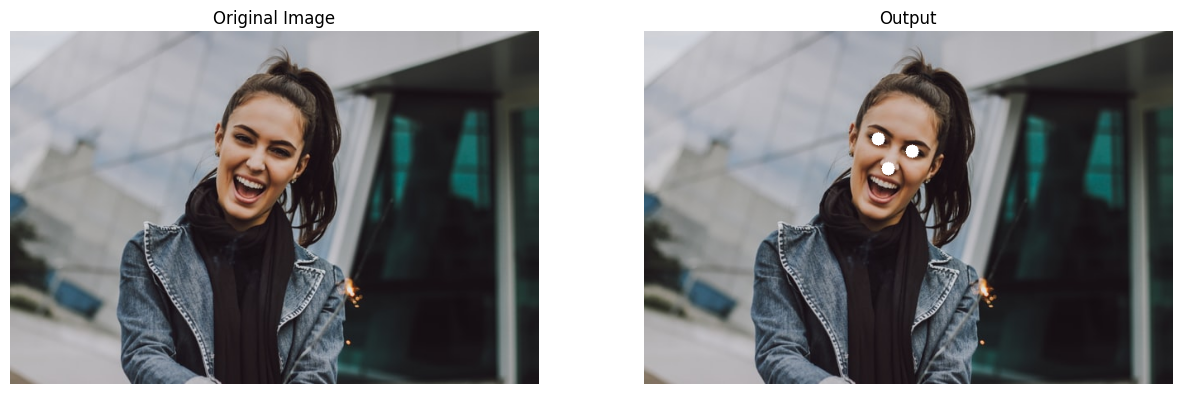

In [4]:
# Read a sample image and get the nose, left eye center, and right eye center landmarks.
image = cv2.imread('media/sample1.jpg')
image, face_landmarks = detectFacialLandmarks(image, face_mesh_images, draw=False, display=False)
if len(face_landmarks)>0:
    getFaceKeypoints(image, face_landmarks)

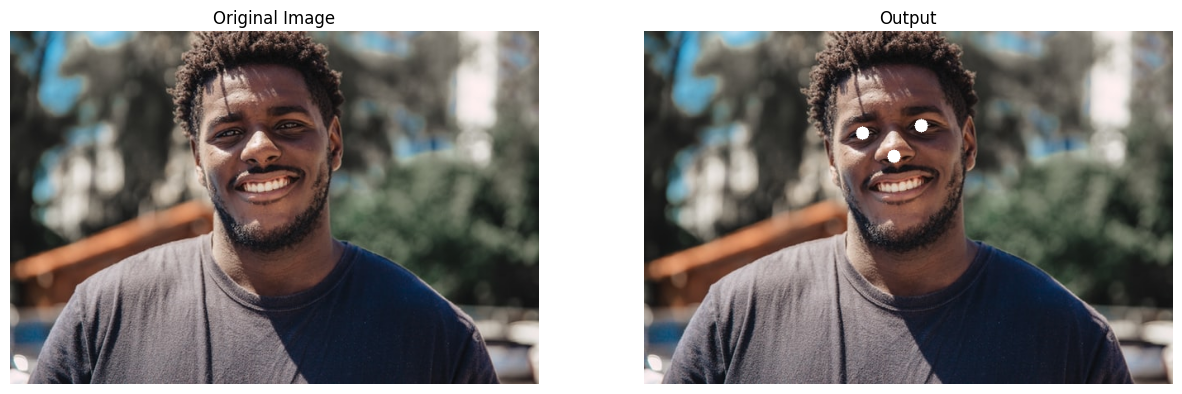

In [5]:
# Read another sample image and get the nose, left eye center, and right eye center landmarks.
image = cv2.imread('media/sample2.jpg')
image, face_landmarks = detectFacialLandmarks(image, face_mesh_images, draw=False, display=False)
if len(face_landmarks)>0:
    getFaceKeypoints(image, face_landmarks)

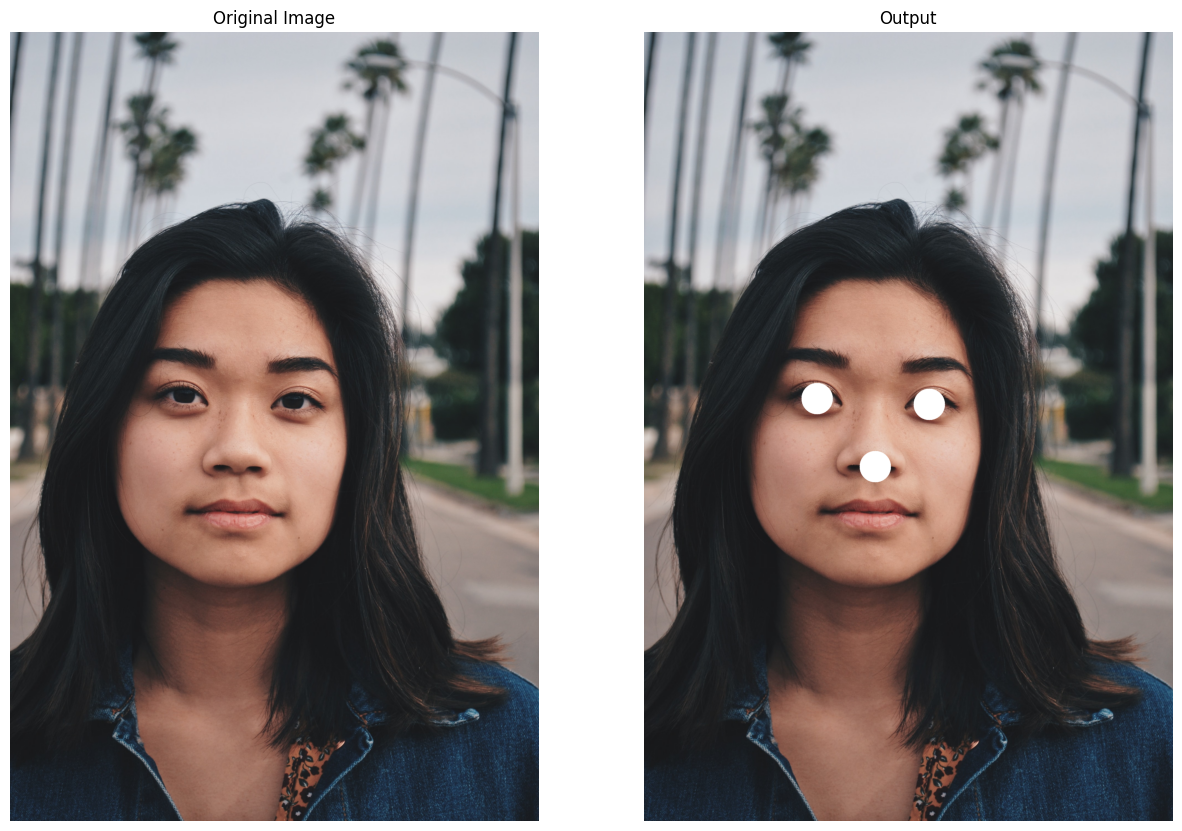

In [6]:
# Read another sample image and get the nose, left eye center, and right eye center landmarks.
image = cv2.imread('media/sample3.jpg')
image, face_landmarks = detectFacialLandmarks(image, face_mesh_images, draw=False, display=False)
if len(face_landmarks)>0:
    getFaceKeypoints(image, face_landmarks)

Cool! working accurately on images, now let's move on to check how this function performs on a real-time webcam feed.

In [7]:
# Initialize the VideoCapture object to read from the webcam.
camera_video = cv2.VideoCapture(1, cv2.CAP_DSHOW)
camera_video.set(3,1280)
camera_video.set(4,960)

# Create named window for resizing purposes.
cv2.namedWindow('Webcam Feed', cv2.WINDOW_NORMAL)

# Iterate until the webcam is accessed successfully.
while camera_video.isOpened():
    
    # Read a frame.
    ok, frame = camera_video.read()
    
    # Check if frame is not read properly then 
    # continue to the next iteration to read the next frame.
    if not ok:
        continue
    
    # Get the height and width of the frame of the webcam video.
    frame_height, frame_width, _ = frame.shape
    
    # Flip the frame horizontally for natural (selfie-view) visualization.
    frame = cv2.flip(frame, 1)
    
    # Perform Face landmarks detection.
    frame, face_landmarks = detectFacialLandmarks(frame, face_mesh_videos, draw=False, display=False)
    
    # Check if the Face landmarks in the frame are detected.
    if len(face_landmarks)>0:
        
        # Get the nose, left eye center, and right eye center landmarks.
        frame, keypoints = getFaceKeypoints(frame, face_landmarks, display=False)
        
    # Display the frame.
    cv2.imshow('Webcam Feed', frame)
    
    # Wait for 1ms. If a key is pressed, retreive the ASCII code of the key.
    k = cv2.waitKey(1) & 0xFF    
    
    # Check if 'ESC' is pressed and break the loop.
    if(k == 27):
        break

# Release the VideoCapture Object and close the windows.                  
camera_video.release()
cv2.destroyAllWindows()


# Additional comments:
#       - In this program, we extract the coordinates
#         for the center of the eyes as well as the nose
#         key points.
#       - For the eyes, we just calculate for the center 
#         of the eyes. To calculate, we take the mean x
#         coordinates of the landmarks in the eyes.

In [8]:
camera_video.release()
cv2.destroyAllWindows()

Perfect! working fine on videos as well.

### **<font style="color:rgb(255,140,0)"> Code License Agreement </font>**
```
Copyright (c) 2022 Bleedai.com

Feel free to use this code for your own projects commercial or noncommercial, these projects can be Research-based, just for fun, for-profit, or even Education with the exception that you’re not going to use it for developing a course, book, guide, or any other educational products.

Under *NO CONDITION OR CIRCUMSTANCE* you may use this code for your own paid educational or self-promotional ventures without written consent from Taha Anwar (BleedAI.com).

```
